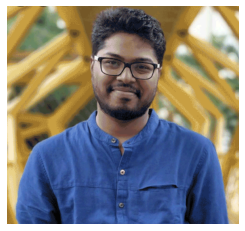

In [65]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
original_image = cv2.imread("3.png")
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [66]:
#the ready made one
# grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
# face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml') 
# detected_faces = face_cascade.detectMultiScale(grayscale_image)
# for (column, row, width, height) in detected_faces:
#     cv2.rectangle(original_image,(column, row),(column + width, row + height),(0, 255, 0),4)    
# plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
# plt.axis("off")
# plt.show()

https://towardsdatascience.com/face-detection-with-haar-cascade-727f68dafd08

integral image (left and above in the Original Image)

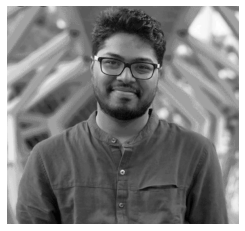

In [67]:
gray_original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_original_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [68]:
print(gray_original_image)
gray_original_image=gray_original_image/255
print(gray_original_image)

[[187 196 172 ... 133 152 130]
 [207 208 203 ... 150 123 154]
 [188 197 173 ... 126 120 127]
 ...
 [139 149 120 ... 178 162 180]
 [124 125 120 ... 178 162 180]
 [120 120 120 ... 171 175 171]]
[[0.73333333 0.76862745 0.6745098  ... 0.52156863 0.59607843 0.50980392]
 [0.81176471 0.81568627 0.79607843 ... 0.58823529 0.48235294 0.60392157]
 [0.7372549  0.77254902 0.67843137 ... 0.49411765 0.47058824 0.49803922]
 ...
 [0.54509804 0.58431373 0.47058824 ... 0.69803922 0.63529412 0.70588235]
 [0.48627451 0.49019608 0.47058824 ... 0.69803922 0.63529412 0.70588235]
 [0.47058824 0.47058824 0.47058824 ... 0.67058824 0.68627451 0.67058824]]


In [69]:
def get_integralimage (img): 
    height,width=img.shape
    integral_image= np.zeros((height+1,width+1))#to add maargin 0 on top and on right
    for i in range(height):
        for j in range(width):
            integral_image[i][j]=img[i][j]+integral_image[i-1][j]+integral_image[i][j-1]-integral_image[i-1][j-1]#because we add the right top pixcel twice
    return integral_image                   

In [70]:
test=np.array([[0.4,0.7,0.9,0.7,0.4,0.5,1.0,0.3],[0.3,1.0,0.5,0.8,0.7,0.4,0.1,0.4],[0.9,0.4,0.1,0.2,0.5,0.8,0.2,0.9],[0.3,0.6,0.8,1.0,0.3,0.7,0.5,0.3],[0.2,0.9,0.1,0.5,0.1,0.4,0.8,0.8],[0.5,0.1,0.3,0.7,0.9,0.6,1.0,0.2],[0.8,0.4,1.0,0.2,0.7,0.3,0.1,0.4],[0.4,0.9,0.6,0.6,0.2,1.0,0.5,0.9]])
integral_image=get_integralimage(test) 
#integral_image=get_integralimage(gray_original_image) 
integral_image=np.delete(integral_image, test.shape[0],0)
integral_image=np.delete(integral_image,test.shape[1],1)    #to remove the ma
print(integral_image)

[[ 0.4  1.1  2.   2.7  3.1  3.6  4.6  4.9]
 [ 0.7  2.4  3.8  5.3  6.4  7.3  8.4  9.1]
 [ 1.6  3.7  5.2  6.9  8.5 10.2 11.5 13.1]
 [ 1.9  4.6  6.9  9.6 11.5 13.9 15.7 17.6]
 [ 2.1  5.7  8.1 11.3 13.3 16.1 18.7 21.4]
 [ 2.6  6.3  9.  12.9 15.8 19.2 22.8 25.7]
 [ 3.4  7.5 11.2 15.3 18.9 22.6 26.3 29.6]
 [ 3.8  8.8 13.1 17.8 21.6 26.3 30.5 34.7]]


 Haar features

In [71]:
#18.9-7.5-3.1+1.1
#29.6-18.6-4.9+3.1
def get_LeftrightHaarfeatures(integral_image,window_height,window_width):
    LeftrightHaarfeatures=[]
    window_width_half=int(window_width/2)
    print(integral_image.shape[0],integral_image.shape[1],window_width_half,window_height,window_width)
    i=0
    j=0
    while(i+window_height<integral_image.shape[0]):
        while(j+window_width<integral_image.shape[1]):
            print(i,j)
            white_Pixels_inHaar = integral_image[i+window_height][j+window_width_half]-integral_image[i+window_height][j]-integral_image[i][j+window_width_half]+integral_image[i][j]
            black_Pixels_inHaar = integral_image[i+window_height][j+window_width]-integral_image[i+window_height][j+window_width_half]-integral_image[i][j+window_width]+integral_image[i][j+window_width_half]
            print(integral_image[i+window_height][j+window_width_half],integral_image[i+window_height][j],integral_image[i][j+window_width_half],integral_image[i][j],white_Pixels_inHaar,integral_image[i+window_height][j+window_width],integral_image[i+window_height][j+window_width_half],integral_image[i][j+window_width],integral_image[i][j+window_width_half],black_Pixels_inHaar)
            delta=(white_Pixels_inHaar-black_Pixels_inHaar)/(window_height*window_width_half)
            print(delta)
            LeftrightHaarfeatures.append(delta)
            j=j+1
        i=i+1   
    return LeftrightHaarfeatures

In [72]:
LeftrightHaarfeatures=get_LeftrightHaarfeatures(integral_image,6,6)
print(LeftrightHaarfeatures)

8 8 3 6 6
0 0
15.3 3.4000000000000004 2.7 0.4 9.6 26.300000000000004 15.3 4.6 2.7 9.100000000000005
0.02777777777777748
0 1
18.9 7.5 3.1 1.1 9.399999999999999 29.600000000000005 18.9 4.8999999999999995 3.1 8.900000000000007
0.027777777777777284
[0.02777777777777748, 0.027777777777777284]


In [79]:
def get_topbottomHaarfeatures(integral_image,window_height,window_width):
    LeftrightHaarfeatures=[]
    window_height_half=int(window_height/2)
    print(integral_image.shape[0],integral_image.shape[1],window_height_half,window_height,window_width)
    i=0
    j=0
    while(i+window_height<integral_image.shape[0]):
        while(j+window_width<integral_image.shape[1]):
            print(i,j)
            white_Pixels_inHaar = integral_image[i+window_height_half][j+window_width]-integral_image[i+window_height_half][j]-integral_image[i][j+window_width]+integral_image[i][j]
            black_Pixels_inHaar = integral_image[i+window_height][j+window_width]-integral_image[i+window_height][j]-integral_image[i+window_height_half][j+window_width]+integral_image[i+window_height_half][j]
            print(integral_image[i+window_height_half][j+window_width],integral_image[i+window_height_half][j],integral_image[i][j+window_width],integral_image[i][j],white_Pixels_inHaar,integral_image[i+window_height][j+window_width],integral_image[i+window_height][j],integral_image[i+window_height_half][j+window_width],integral_image[i+window_height_half][j],black_Pixels_inHaar)
            delta=(white_Pixels_inHaar-black_Pixels_inHaar)/(window_height_half*window_width)
            print(delta)
            LeftrightHaarfeatures.append(delta)
            j=j+1
        i=i+1   
    return LeftrightHaarfeatures

In [80]:
topbottomHaarfeatures=get_topbottomHaarfeatures(integral_image,6,6)
print(topbottomHaarfeatures)

8 8 3 6 6
0 0
15.700000000000006 1.9000000000000001 4.6 0.4 9.600000000000007 26.300000000000004 3.4000000000000004 15.700000000000006 1.9000000000000001 9.1
0.027777777777778172
0 1
17.60000000000001 4.6 4.8999999999999995 1.1 9.200000000000008 29.600000000000005 7.5 17.60000000000001 4.6 9.099999999999996
0.005555555555556226
[0.027777777777778172, 0.005555555555556226]
